# Fundamental of Simulation Methods
**Name**: Maximilian Richter

**Matrikel Number**: 3463789

**Student ID**: hy455

# Problem Set 11: Preparation of an SPH simulation

## 11.1: Coding of the framework
### 1) + 2) + 3) Implementation of Gaussian Kernel, Pairwise Distance and Density Calculation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma


# Gaussian kernel
def W(x, y, z, h):
    """
    Gaussian kernel in 3D
    x,y,z     list of positions in x, y, z
    h         smoothing length

    return    smoothing function
    """

    r = np.sqrt(x**2 + y**2 + z**2)
    w = 1/(np.sqrt(np.pi)*h)**3*np.exp(-(r**2) / h**2)

    return w


# derivative of Gaussian kernel
def grad_W(x, y, z, h):
    """
    Gradient of the Gausssian kernel W
    x,y,z     list of positions in x, y, z
    h         smoothing length
    wx,wy,wz  gradient of W
    """

    r = np.sqrt(x**2 + y**2 + z**2)
    dwx = -2 * x / (np.pi * h**5) * np.exp(-(r**2) / h**2)
    dwy = -2 * y / (np.pi * h**5) * np.exp(-(r**2) / h**2)
    dwz = -2 * z / (np.pi * h**5) * np.exp(-(r**2) / h**2)

    return dwx, dwy, dwz


def compute_pairwise_distances(ri, rj):
    """
    compute pairwise separations between 2 sets of coordinates
    ri    is an N x 3 matrix of positions
    rj    is an N x 3 matrix of positions
    dx, dy, dz   are N x N matrices of separations
    """
    dx = ri[:, 0, np.newaxis] - rj[:, 0]
    dy = ri[:, 1, np.newaxis] - rj[:, 1]
    dz = ri[:, 2, np.newaxis] - rj[:, 2]

    return dx, dy, dz


def compute_density(r, pos, m, h):
    """
    Compute density at sampling locations from SPH particle distribution
    r     is an N x 3 matrix of sampling locations
    pos   is an N x 3 matrix of SPH particle positions
    m     is the particle mass
    h     is the smoothing length
    rho   is M vector of densities
    """

    dist = compute_pairwise_distances(r, pos)
    rho = np.sum(m * W(dist[0], dist[1], dist[2], h), axis=1)

    return rho


def compute_number_neighbors(pos, h):
    """
    Compute number of neighbors within radius of 2*smoothing length
    """

    dx, dy, dz = compute_pairwise_distances(pos, pos)

    distances = np.sqrt(dx**2 + dy**2 + dz**2)
    Nneigh = np.sum(distances < 2 * h, axis=1)

    return Nneigh

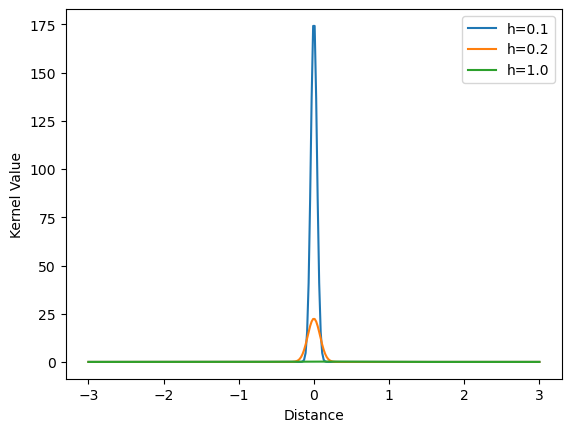

In [7]:
h_values = [0.1, 0.2, 1.0]
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
z = np.linspace(-3, 3, 300)

for h in h_values:
    w_values = W(x, y, z, h)
    plt.plot(x, w_values, label=f"h={h}")

plt.xlabel("Distance")
plt.ylabel("Kernel Value")
plt.legend()
plt.show()


## 11.2: Investigation of randomly placed particles

h= 0.02
rho= 27594.246454746295
h= 0.05
rho= 6079.102042130423
h= 0.1
rho= 4412.221989261628
h= 0.2
rho= 3539.234271729123
h= 0.3
rho= 2893.336327605647


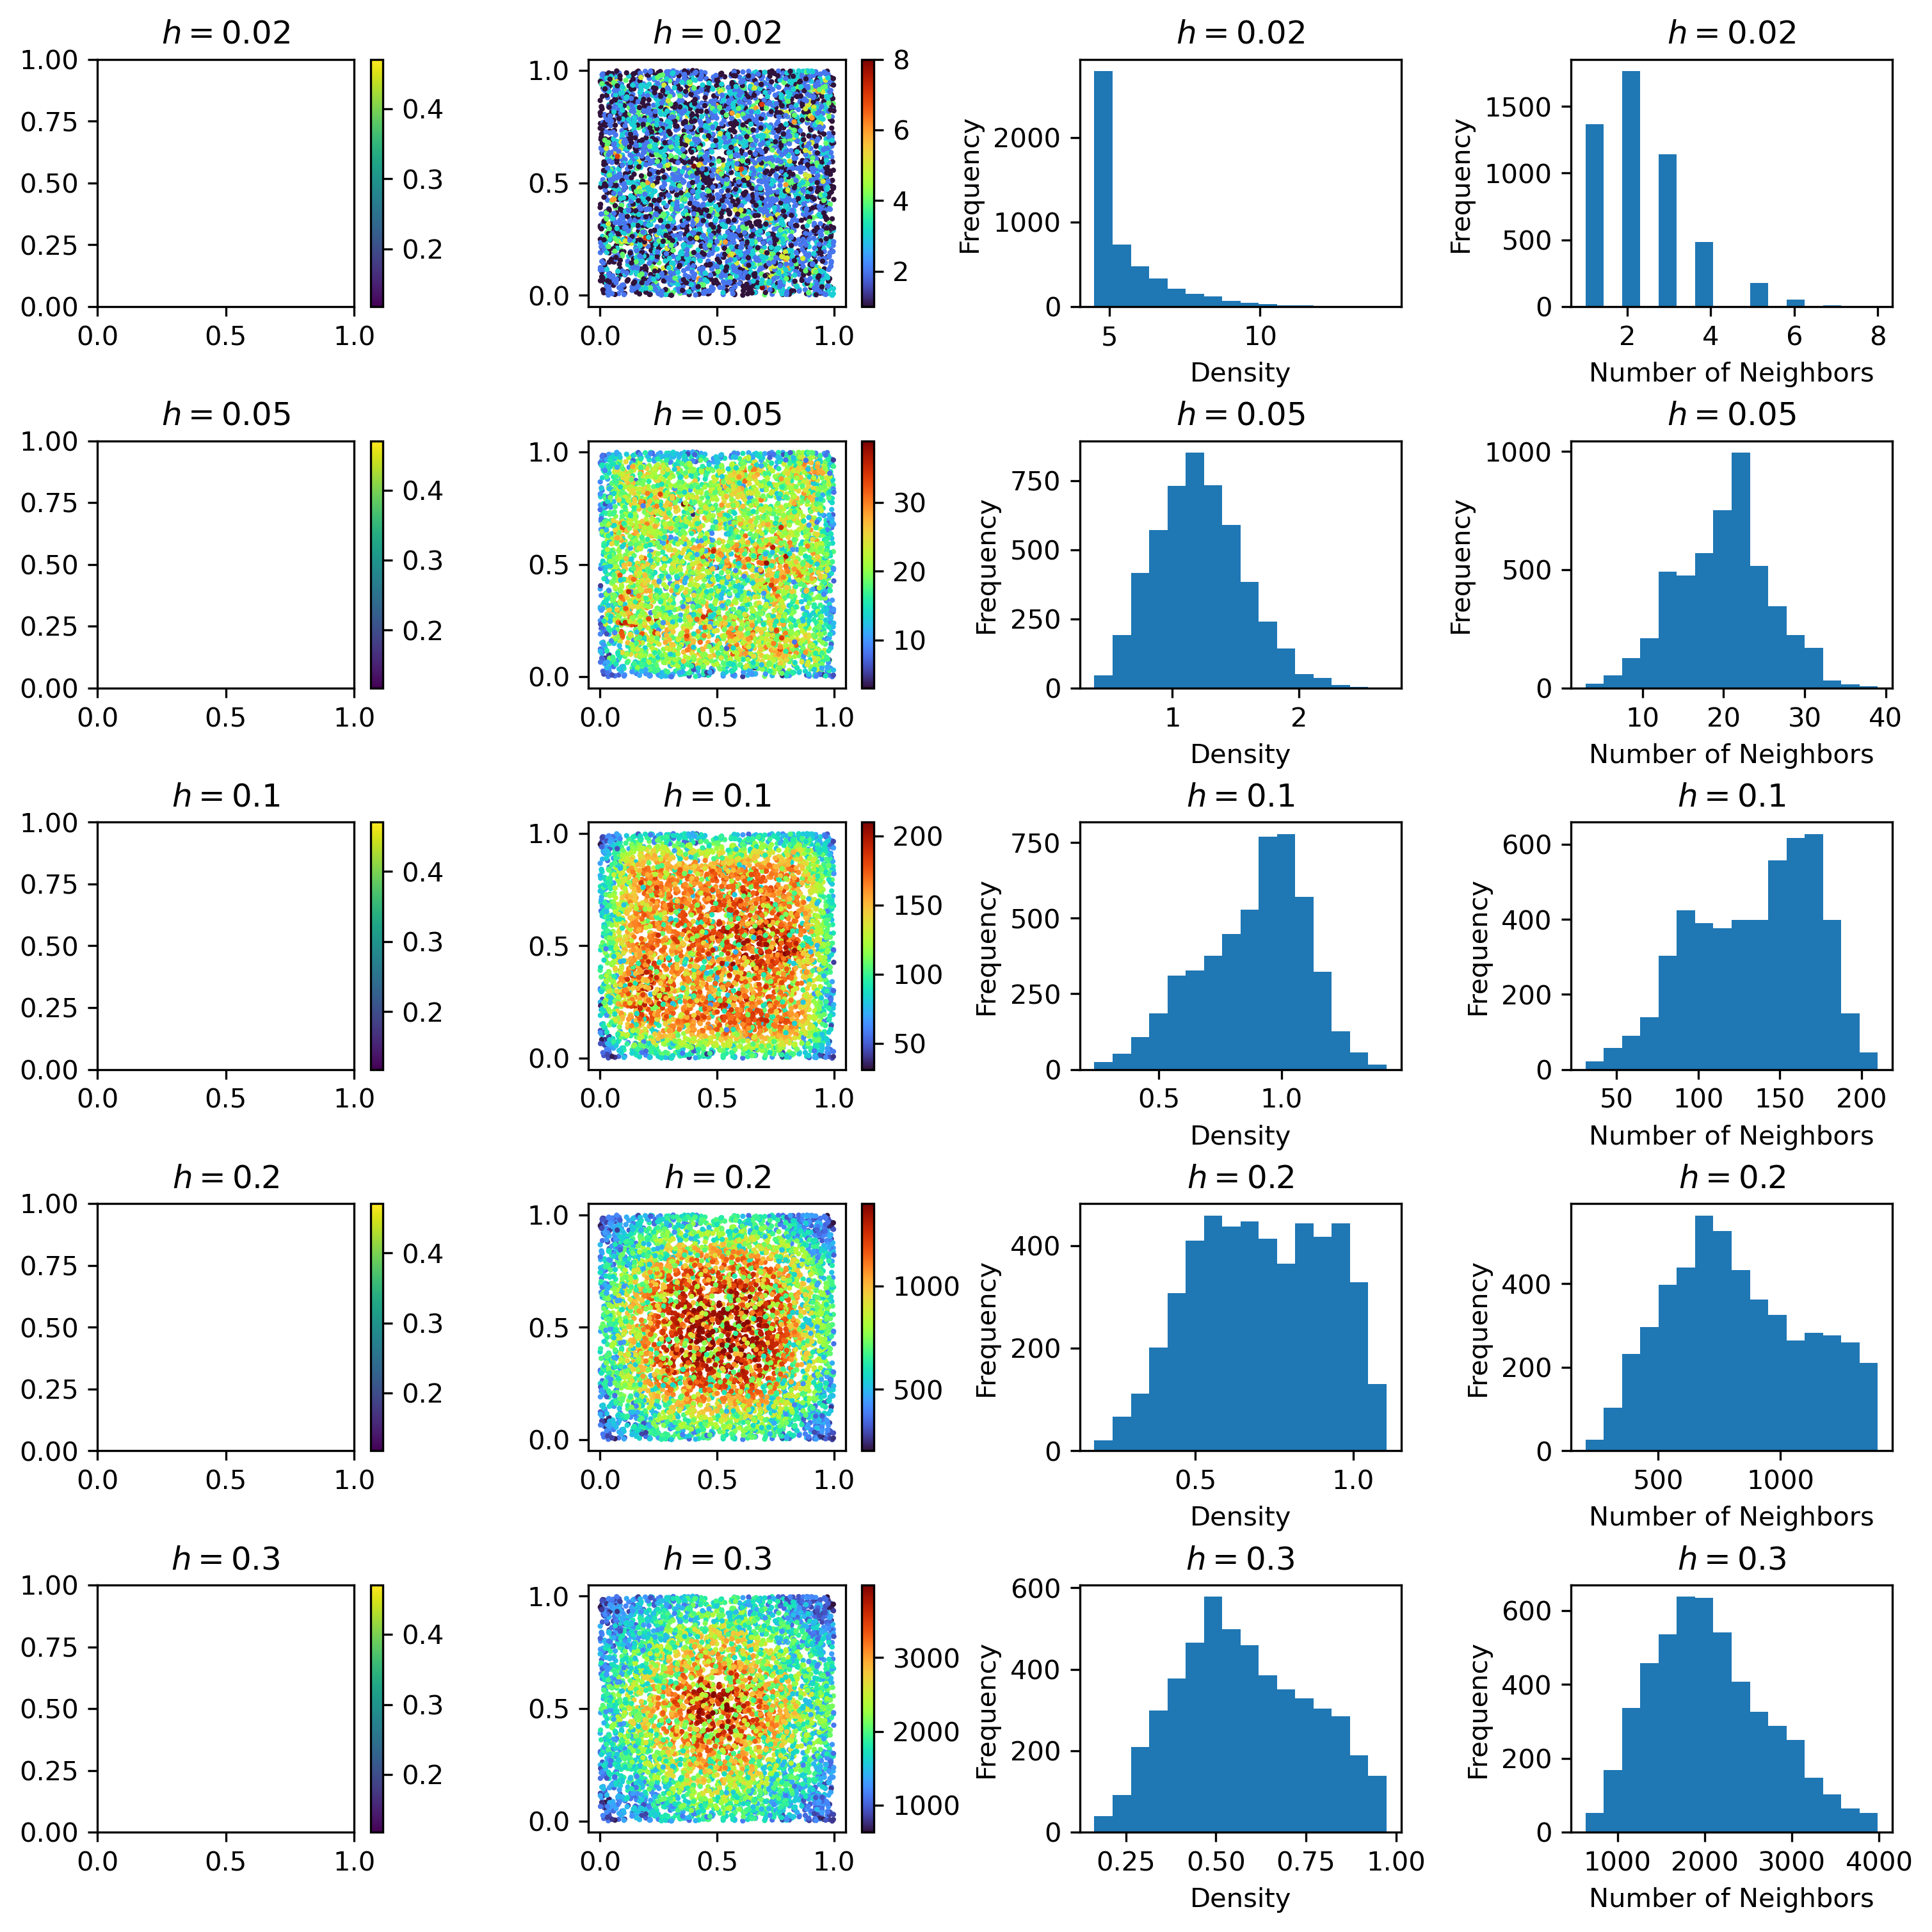

In [12]:

# Simulation parameters
N = 5000  # Number of particles
M = 1.0  # total mass

# Generate Initial Conditions
np.random.seed(4711)  # set the random number generator seed

m = M / N  # single particle mass
pos = np.random.rand(N, 3)  # randomly selected positions and velocities

resolution = 128
lin = np.linspace(0, 1, resolution)
x, y = np.meshgrid(lin, lin)
r = np.array([x.flatten(), y.flatten(), np.zeros(x.shape).flatten()]).T

fig, ax = plt.subplots(5, 4, figsize=(10,10), dpi=300)

# loop over different smoothing lengths
for i,h in enumerate([0.02, 0.05, 0.1, 0.2, 0.3]):
    print("h=", h)

    # compute density at initial positions
    rho = compute_density(pos, pos, m, h)
    print("rho=", np.sum(rho))

    # plot positions with density color coded
    #im = ax[i,0].imshow(rho.reshape(resolution, resolution))
    ax[i,0].set_title(f"$h={h}$")
    fig.colorbar(im, ax=ax[i,0], orientation='vertical', pad=0.05)

    # compute number of neighbors
    Nn = compute_number_neighbors(pos, h)

    # plot positions with Nn color coded
    scatter = ax[i,1].scatter(pos[:, 0], pos[:, 1], c=Nn, cmap="turbo", s=1)
    ax[i,1].set_title(f"$h={h}$")
    fig.colorbar(scatter, ax=ax[i,1], orientation='vertical', pad=0.05)

    # make histogram of densities
    ax[i,2].hist(rho, bins=16)
    ax[i,2].set_title(f"$h={h}$")
    ax[i,2].set_xlabel("Density")
    ax[i,2].set_ylabel("Frequency")

    # make histogram of number of neighbors
    ax[i,3].hist(Nn, bins=16)
    ax[i,3].set_title(f"$h={h}$")
    ax[i,3].set_xlabel("Number of Neighbors")
    ax[i,3].set_ylabel("Frequency")

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.show()


2) The density gets smoother the higher the kernel length $h$ is. This also comes with a decrease in the maximum value of the density. For small $h$ the density peaks at some points considerably while for large $h$ the is density is equally high everywhere.
3) The smallest smoothing length leads to a more washed out density and thus there is nowhere any low density. 
4) For large $h$ the density is very smoothed, this is because many particles are weighted together. 
